In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

/home/yuncong/MouseBrainAtlas/src/utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtuale

Setting environment for Precision WorkStation
{'MD585': 0.46}


/home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
xgboost is not loaded.


In [407]:
mean_data = 117 * np.ones((3, 224,224), np.uint8)

In [408]:
np.save('/home/yuncong/InceptionBN-21K-for-Caffe/mean_data.npy', mean_data)

In [411]:
 model0, arg_params, aux_params = \
    mx.model.load_checkpoint('/home/yuncong/InceptionBN-21K-for-Caffe/Inception21k', 0)

MXNetError: [06:27:22] src/io/local_filesys.cc:166: Check failed: allow_null  LocalFileSystem: fail to open "/home/yuncong/InceptionBN-21K-for-Caffe/Inception21k-symbol.json"

Stack trace returned 10 entries:
[bt] (0) /home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/mxnet/libmxnet.so(+0x29fc559) [0x7f3abc7dd559]
[bt] (1) /home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/mxnet/libmxnet.so(+0x29f2cda) [0x7f3abc7d3cda]
[bt] (2) /home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/local/lib/python2.7/site-packages/mxnet/libmxnet.so(MXSymbolCreateFromFile+0x4e) [0x7f3abc1ee66e]
[bt] (3) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call_unix64+0x4c) [0x7f3b5da18e40]
[bt] (4) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call+0x2eb) [0x7f3b5da188ab]
[bt] (5) /home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/lib/python2.7/lib-dynload/_ctypes.x86_64-linux-gnu.so(_ctypes_callproc+0x48f) [0x7f3b5dc283df]
[bt] (6) /home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/lib/python2.7/lib-dynload/_ctypes.x86_64-linux-gnu.so(+0x11d82) [0x7f3b5dc2cd82]
[bt] (7) /home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/bin/python(PyObject_Call+0x43) [0x4b0c93]
[bt] (8) /home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/bin/python(PyEval_EvalFrameEx+0x602f) [0x4c9f9f]
[bt] (9) /home/yuncong/MouseBrainAtlas/mousebrainatlas_virtualenv/bin/python(PyEval_EvalCodeEx+0x255) [0x4c2705]


In [240]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.


In [101]:
img = imread('/data/CSHL_data_processed/MD589/MD589_prep2_raw_gray/MD589-N30-2015.07.30-18.03.11_MD589_2_0089_prep2_raw_gray.tif')

In [108]:
display_image(img[330*32:330*32+224, 250*32:250*32+224])

/home/yuncong/MouseBrainAtlas/src/learning/tmp.jpg

In [109]:
im = img[330*32:330*32+224, 250*32:250*32+224]

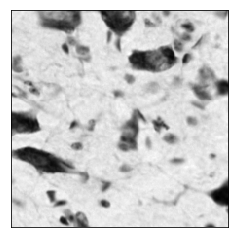

In [214]:
plt.imshow(im, plt.cm.gray);
plt.xticks([]);
plt.yticks([]);

In [63]:
from collections import namedtuple

In [241]:
arg_params, aux_params = model.get_params()

In [242]:
Batch = namedtuple('Batch', ['data'])

In [243]:
model.symbol.get_internals().list_outputs()

['data',
 'conv_1_weight',
 'conv_1_bias',
 'conv_1_output',
 'bn_1_gamma',
 'bn_1_beta',
 'bn_1_moving_mean',
 'bn_1_moving_var',
 'bn_1_output',
 'relu_1_output',
 'pool_1_output',
 'conv_2_red_weight',
 'conv_2_red_bias',
 'conv_2_red_output',
 'bn_2_red_gamma',
 'bn_2_red_beta',
 'bn_2_red_moving_mean',
 'bn_2_red_moving_var',
 'bn_2_red_output',
 'relu_2_red_output',
 'conv_2_weight',
 'conv_2_bias',
 'conv_2_output',
 'bn_2_gamma',
 'bn_2_beta',
 'bn_2_moving_mean',
 'bn_2_moving_var',
 'bn_2_output',
 'relu_2_output',
 'pool_2_output',
 'conv_3a_1x1_weight',
 'conv_3a_1x1_bias',
 'conv_3a_1x1_output',
 'bn_3a_1x1_gamma',
 'bn_3a_1x1_beta',
 'bn_3a_1x1_moving_mean',
 'bn_3a_1x1_moving_var',
 'bn_3a_1x1_output',
 'relu_3a_1x1_output',
 'conv_3a_3x3_reduce_weight',
 'conv_3a_3x3_reduce_bias',
 'conv_3a_3x3_reduce_output',
 'bn_3a_3x3_reduce_gamma',
 'bn_3a_3x3_reduce_beta',
 'bn_3a_3x3_reduce_moving_mean',
 'bn_3a_3x3_reduce_moving_var',
 'bn_3a_3x3_reduce_output',
 'relu_3a_3x3_re

In [392]:
conv_1_output = model.symbol.get_internals()['bn_3b_3x3_output']

In [393]:
num_gpus = 1
devs = [mx.gpu(i) for i in range(num_gpus)]

In [394]:
mod = mx.mod.Module(symbol=conv_1_output, context=devs)

In [395]:
mod.bind(for_training=False, data_shapes=[('data', (1,1,224,224))])

In [396]:
mod.set_params(arg_params, aux_params)

In [397]:
mod.forward(Batch([mx.nd.array([[im]])]))

In [398]:
conv_1_output_map = mod.get_outputs()[0].asnumpy()
print conv_1_output_map.shape

(1, 96, 27, 27)


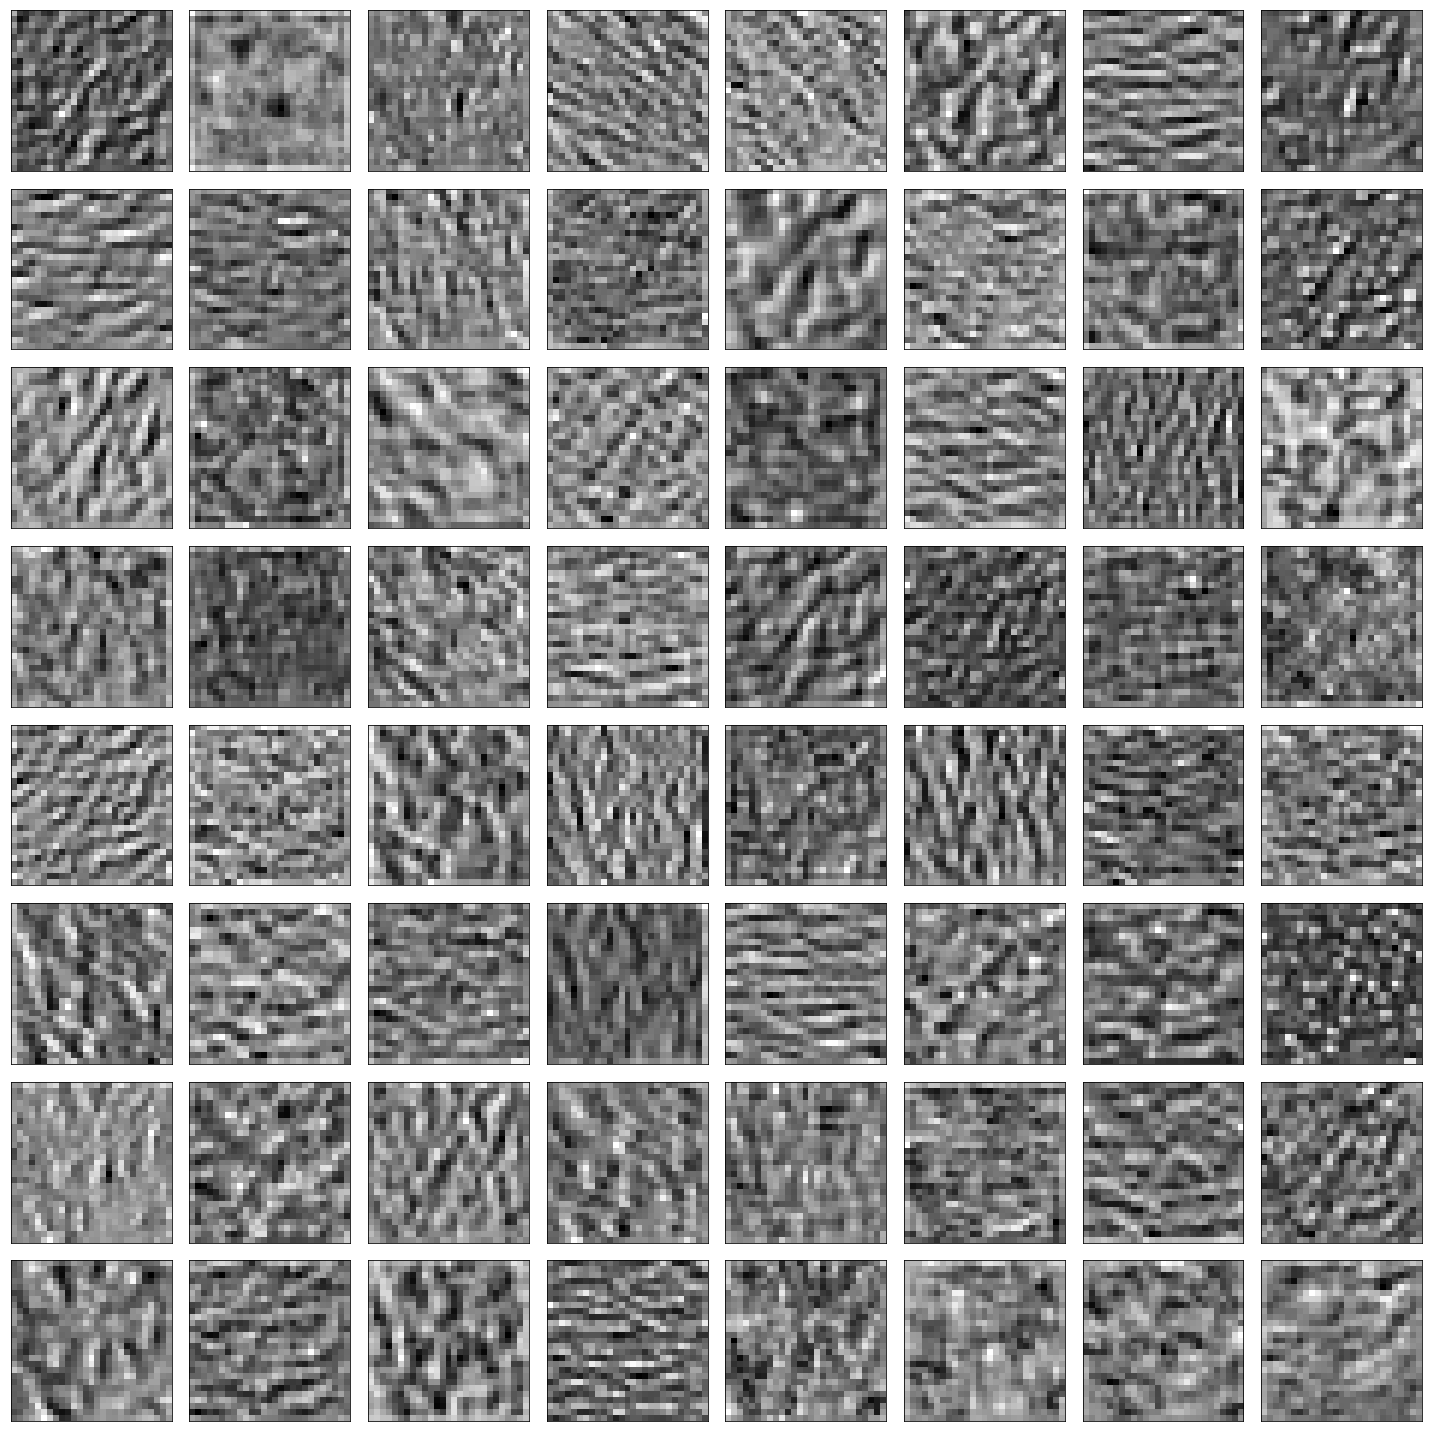

In [399]:
fig, axes = plt.subplots(8,8, figsize=(20,20))

rand_ids = np.random.choice(len(conv_1_output_map[0]), 64, replace=False)

for i in range(8):
    for j in range(8):
        axes[i][j].imshow(conv_1_output_map[0][rand_ids[i*8+j]], cmap=plt.cm.gray);
        axes[i][j].set_xticks([]);
        axes[i][j].set_yticks([]);
fig.tight_layout();

In [121]:
arg_params, aux_params = model.get_params()

In [27]:
conv_1_weight = arg_params['conv_1_weight'].asnumpy()

In [30]:
conv_1_weight = np.squeeze(conv_1_weight)

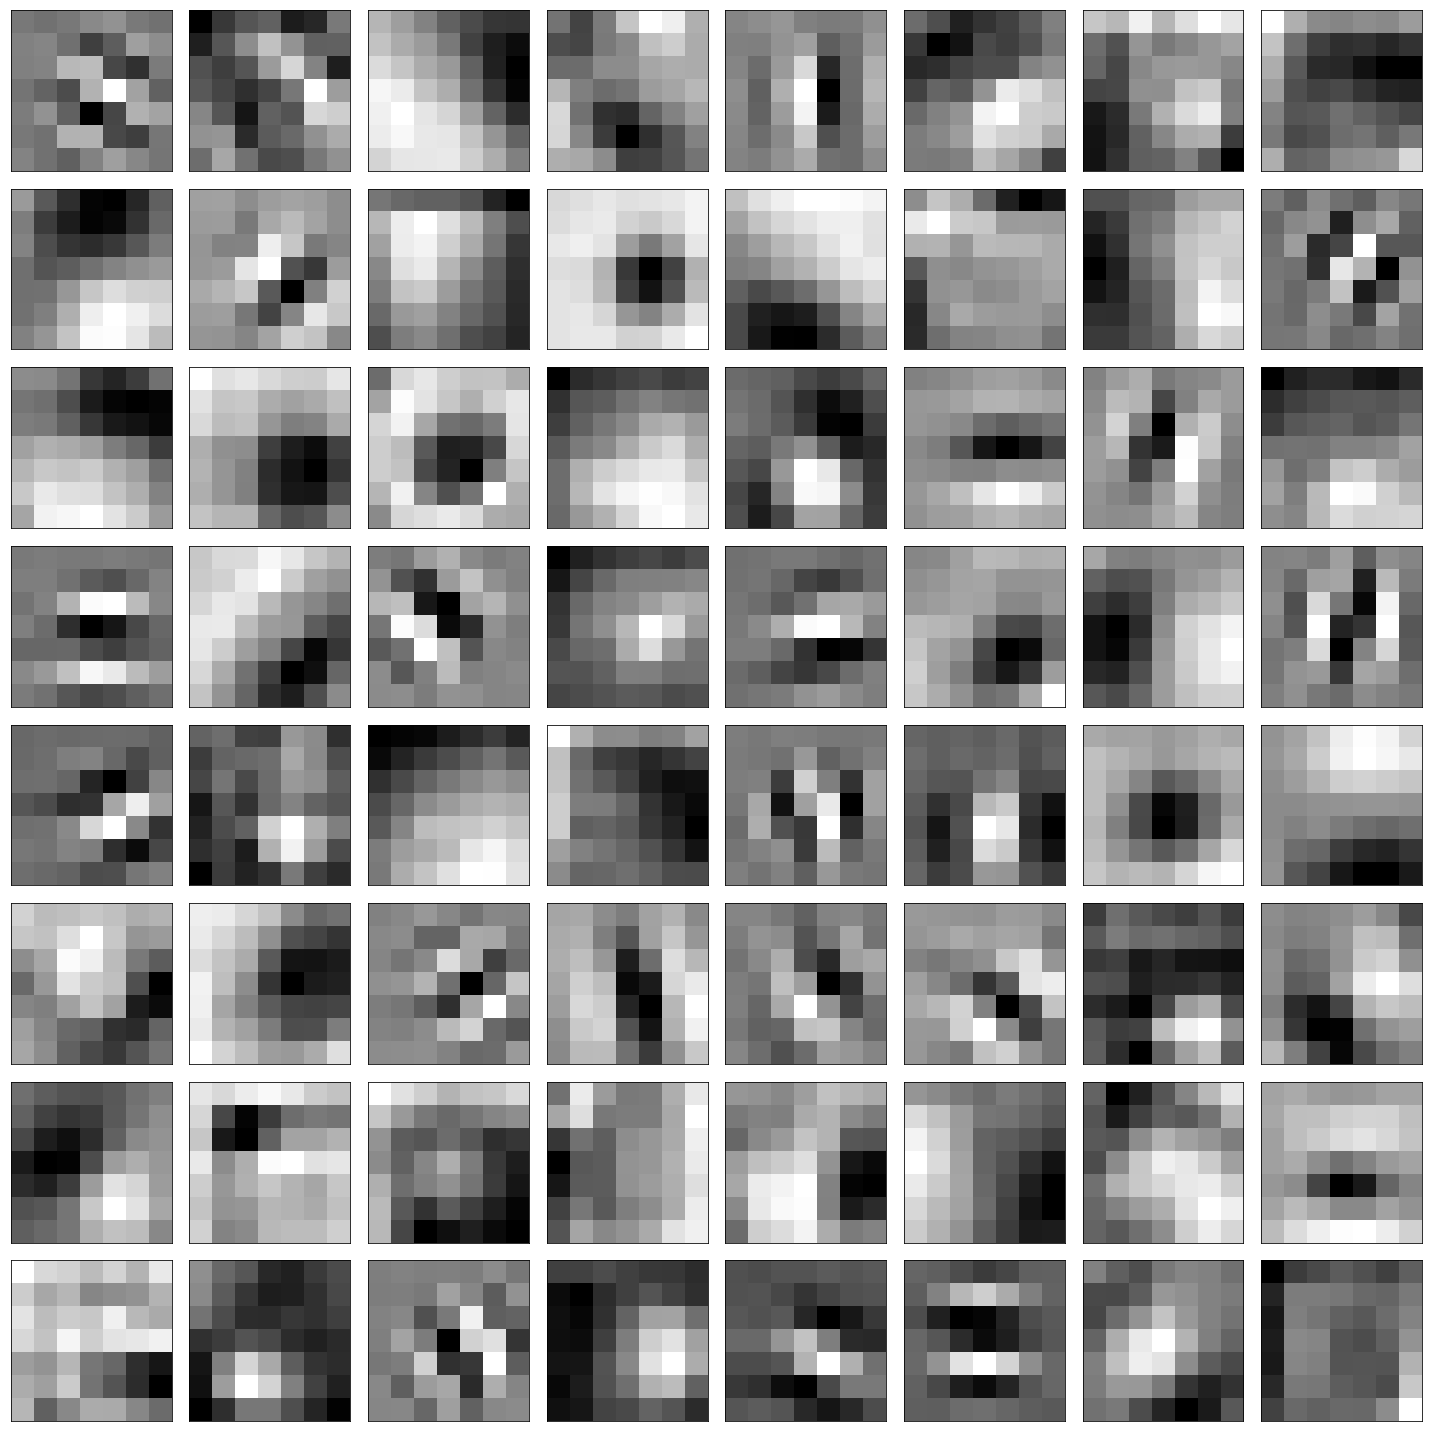

In [41]:
fig, axes = plt.subplots(8,8, figsize=(20,20))
for i in range(8):
    for j in range(8):
        axes[i][j].imshow(conv_1_weight[i * 8 + j], cmap=plt.cm.gray);
#         axes[i][j].set_yticklabels([]);
#         axes[i][j].set_xticklabels([]);
        axes[i][j].set_xticks([]);
        axes[i][j].set_yticks([]);
fig.tight_layout();

In [208]:
conv_3_weight = arg_params['conv_2_weight'].asnumpy()

In [218]:
from scipy.signal import convolve2d

In [227]:
conv_3_weight.shape

(192, 64, 3, 3)

In [229]:
layer2_weights = [convolve2d(conv_1_weight[i], conv_3_weight[j][i])
for j in range(192)
for i in range(64)]

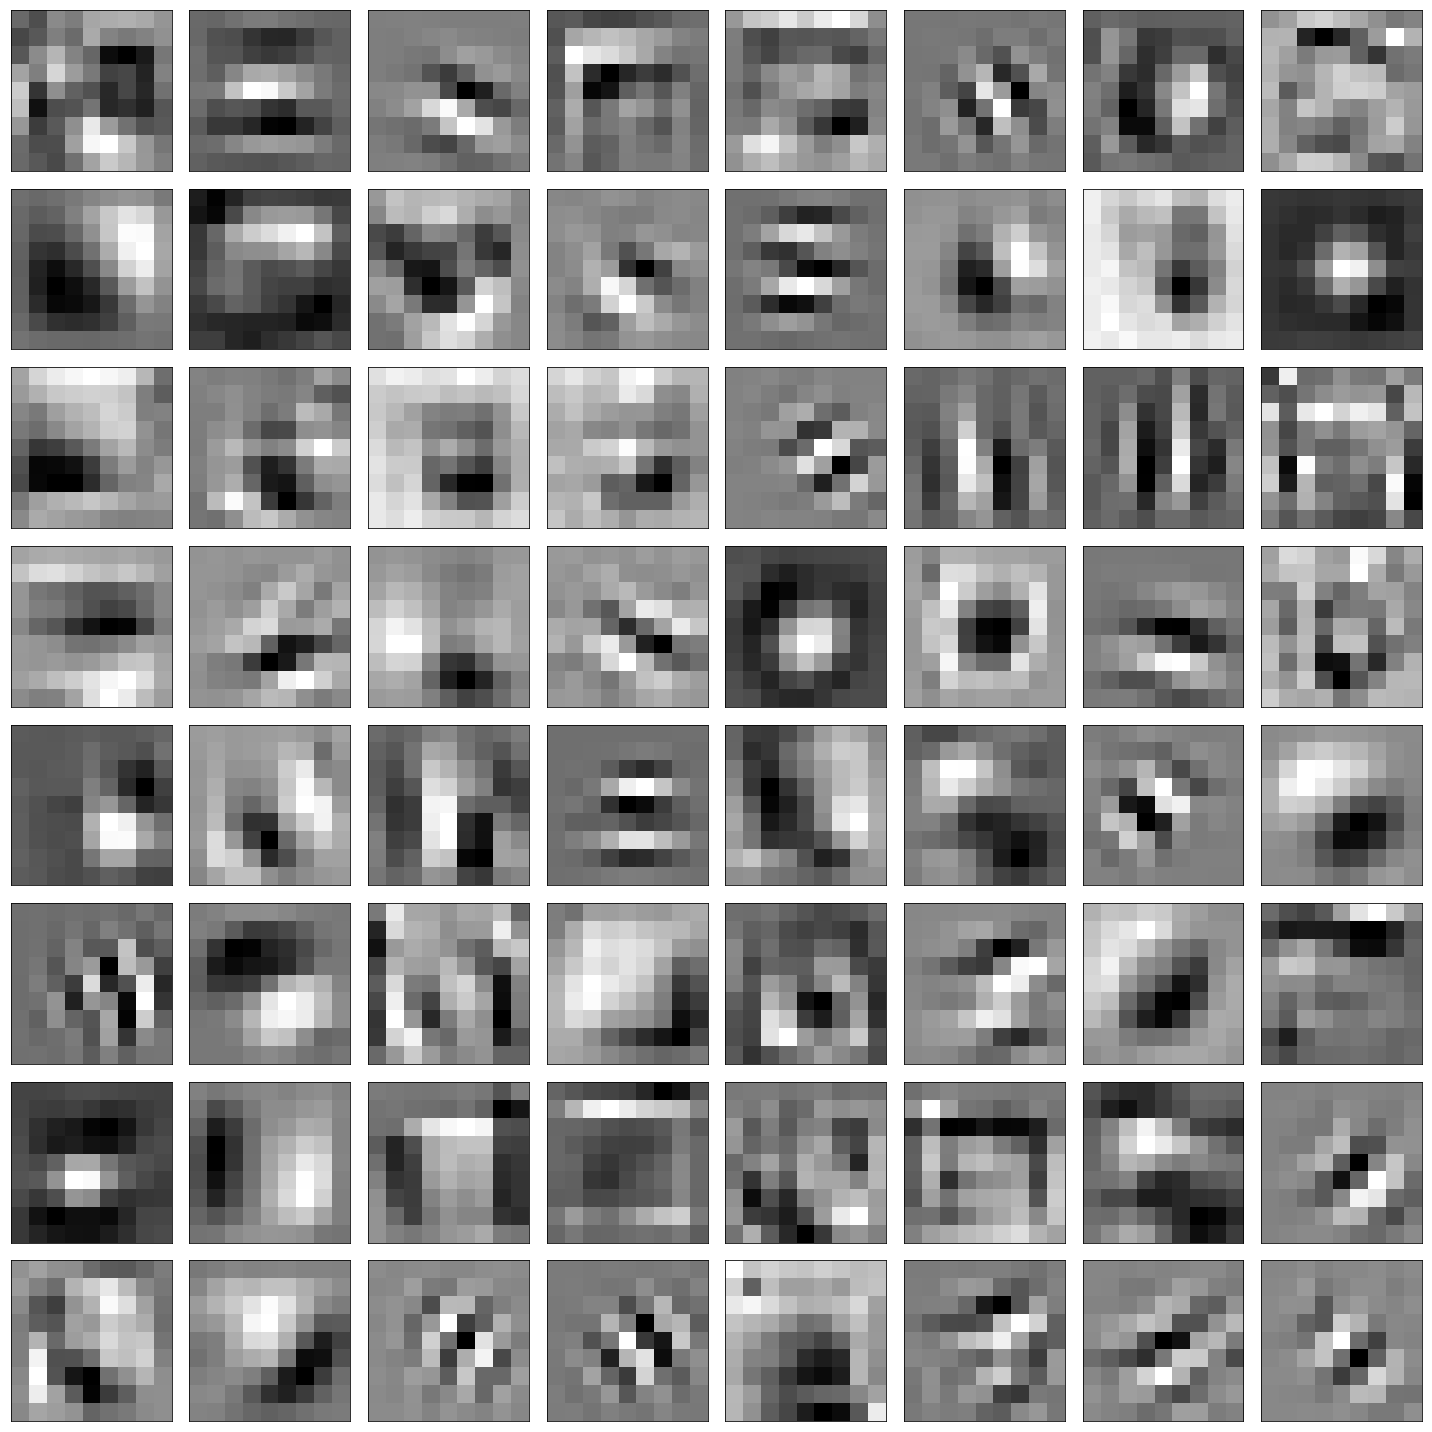

In [233]:
fig, axes = plt.subplots(8,8, figsize=(20,20))
for i in range(8):
    for j in range(8):
        axes[i][j].imshow(layer2_weights[np.random.randint(0, len(layer2_weights))], cmap=plt.cm.gray);
#         axes[i][j].set_yticklabels([]);
#         axes[i][j].set_xticklabels([]);
        axes[i][j].set_xticks([]);
        axes[i][j].set_yticks([]);
fig.tight_layout();

In [209]:
conv_3_weight = np.squeeze(conv_3_weight)

In [210]:
conv_3_weight.shape

(192, 64, 3, 3)

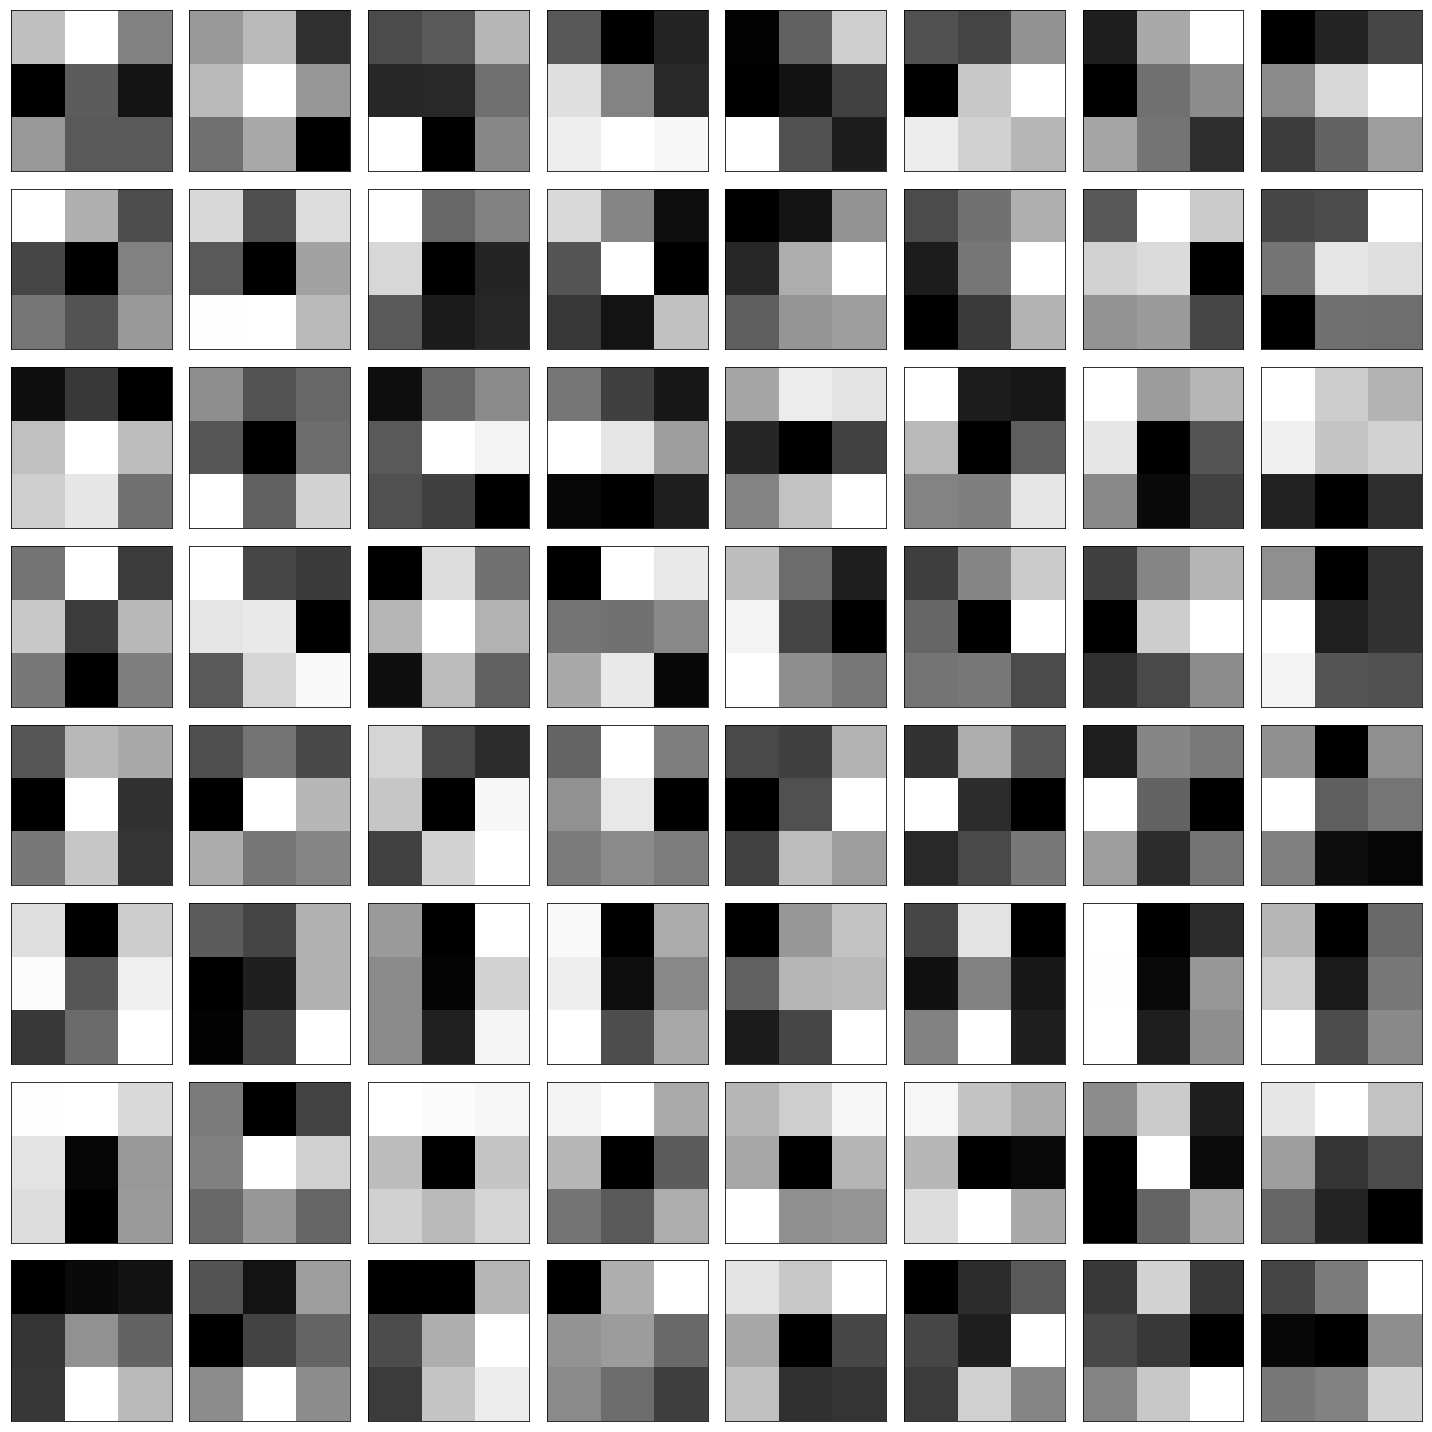

In [211]:
fig, axes = plt.subplots(8,8, figsize=(20,20))
for i in range(8):
    for j in range(8):
        axes[i][j].imshow(conv_3_weight[i, j], cmap=plt.cm.gray);
#         axes[i][j].set_yticklabels([]);
#         axes[i][j].set_xticklabels([]);
        axes[i][j].set_xticks([]);
        axes[i][j].set_yticks([]);
fig.tight_layout();